## Data Analysis:
### Dividing the data into mode types and analysing them with other features

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./train_preprocessed.csv")
pd.set_option('display.max_columns', None) # shows all columns in output dataframe 
temp_data = data.copy()

In [3]:
standard_mode = ['solo-fpp', 'duo', 'squad', 'squad-fpp', 'duo-fpp', 'solo']
arcade_mode = ['normal-duo-fpp', 'normal-squad-fpp','normal-solo-fpp','normal-duo', 'normal-squad','normal-solo']
other = ['crashfpp', 'flarefpp','flaretpp','crashtpp']

In [4]:
temp_data.matchType = temp_data.matchType.replace(standard_mode,'standard-mode')
temp_data.matchType = temp_data.matchType.replace(arcade_mode,'arcade-mode')
temp_data.matchType = temp_data.matchType.replace(other,'other')

In [5]:
standard_data = temp_data[temp_data.matchType == 'standard-mode']
arcade_data = temp_data[temp_data.matchType == 'arcade-mode']
other_data = temp_data[temp_data.matchType == 'other']
standard_data.reset_index(drop=True, inplace=True)
arcade_data.reset_index(drop=True, inplace=True)
other_data.reset_index(drop=True, inplace=True)

In [6]:
def setSize(x, y):
    sns.set(rc = {'figure.figsize':(x,y)})

## Assists

In [7]:
data.assists.describe()

count    3.112337e+06
mean     2.339612e-01
std      5.888382e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+01
Name: assists, dtype: float64

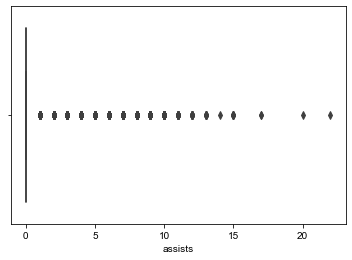

In [8]:
sns.boxplot(x=data.assists)
setSize(8, 8)

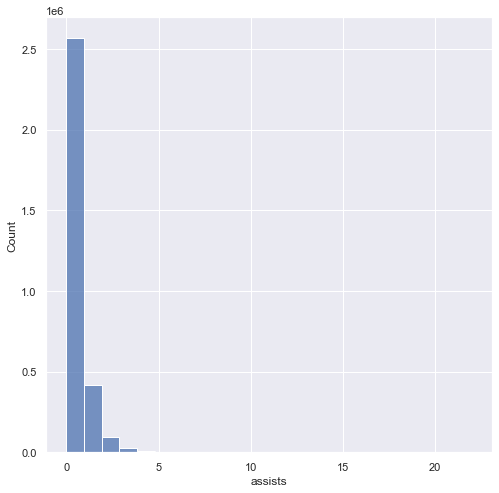

In [9]:
sns.histplot(data=data.assists)
setSize(10, 5)

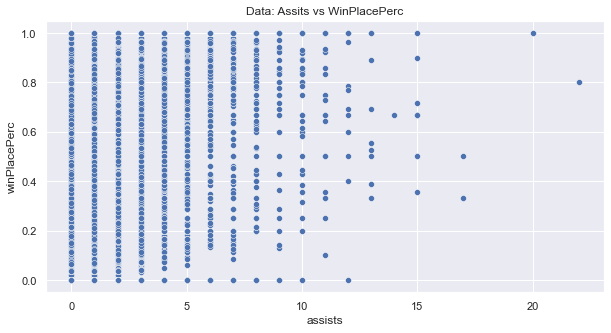

In [10]:
sns.scatterplot(x=data.assists, y=data.winPlacePerc)
plt.title("Data: Assits vs WinPlacePerc")
setSize(8, 8)

 ### Standard_Mode

In [11]:
standard_data.assists.describe()

count    3.087707e+06
mean     2.288627e-01
std      5.704149e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.200000e+01
Name: assists, dtype: float64

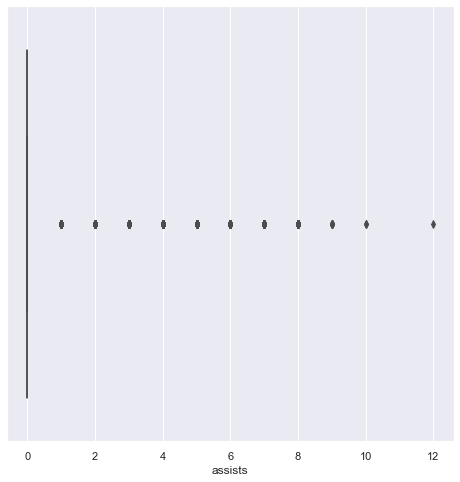

In [12]:
sns.boxplot(x = standard_data.assists)
setSize(10, 5)

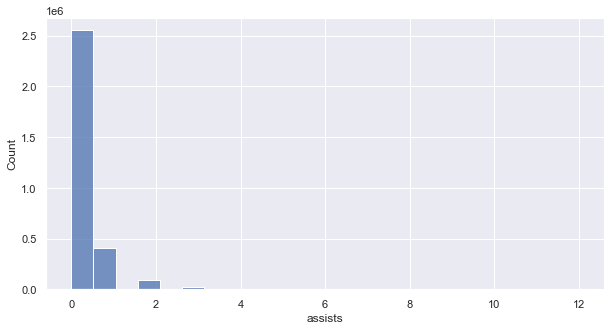

In [13]:
sns.histplot(data=standard_data.assists)
setSize(10, 5)

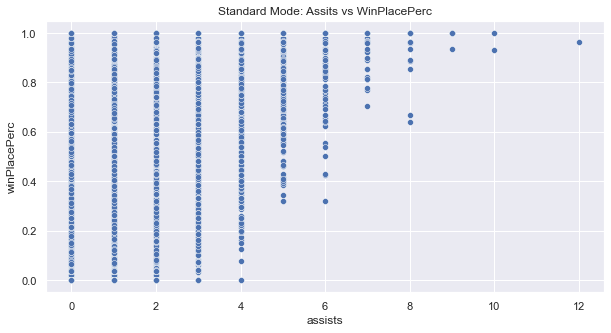

In [14]:
sns.scatterplot(x = standard_data.assists, y = standard_data.winPlacePerc)
plt.title("Standard Mode: Assits vs WinPlacePerc")
setSize(20, 20)

In [1]:
standard_data[standard_data.assists > 5].winPlacePerc.mean()

NameError: name 'standard_data' is not defined

We can say that player's with assists >= 5 are having win place percentage of atleast 0.37

#### Arcade Mode

In [16]:
arcade_assists = arcade_data.assists
arcade_assists.describe()

count    17757.000000
mean         1.124965
std          1.808681
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         22.000000
Name: assists, dtype: float64

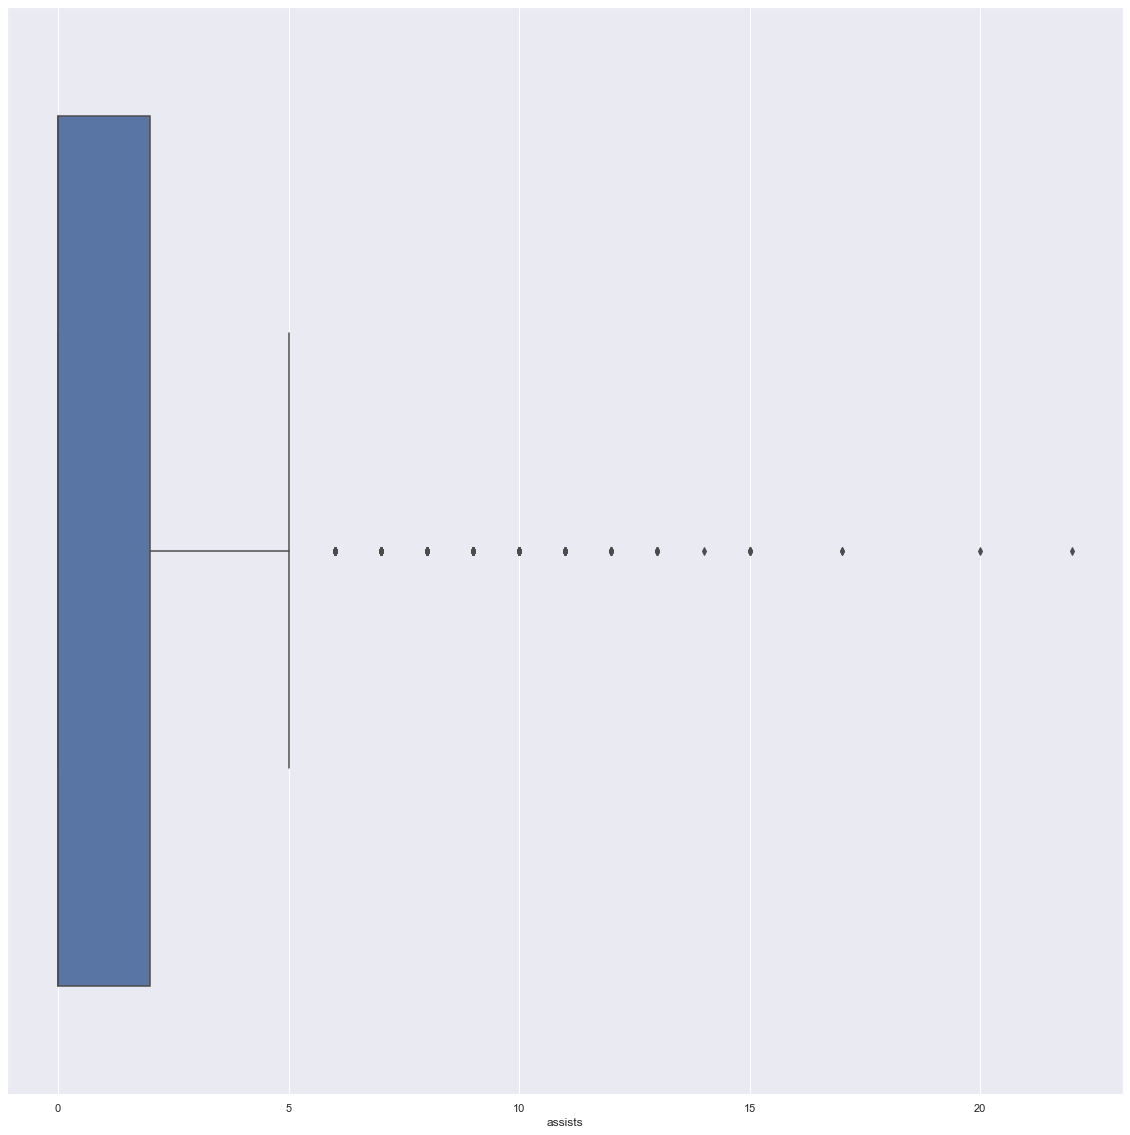

In [17]:
sns.boxplot(x = arcade_assists)
setSize(10, 5)

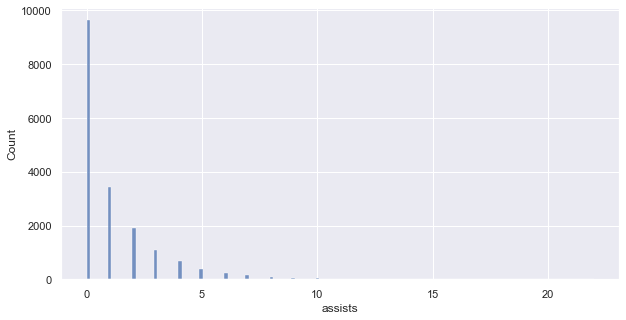

In [18]:
sns.histplot(data=arcade_assists)
setSize(20, 10)

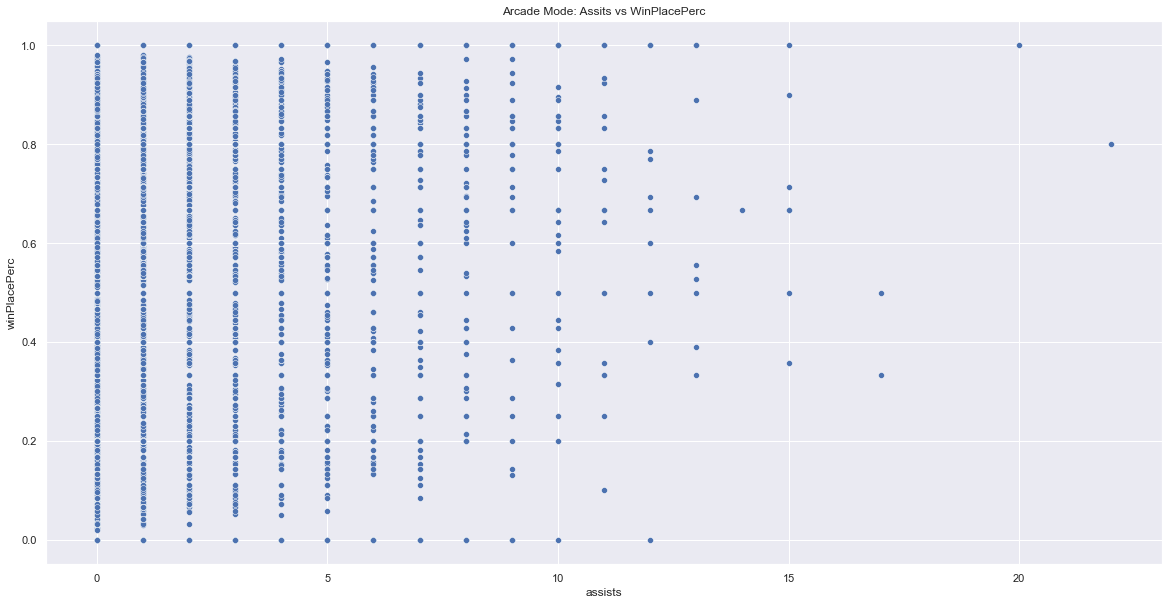

In [19]:
sns.scatterplot(x = arcade_data.assists, y = arcade_data.winPlacePerc)
plt.title("Arcade Mode: Assits vs WinPlacePerc")
setSize(15, 15)

### Other Mode

In [20]:
other_assists = other_data.assists
other_assists.describe()

count    6873.000000
mean        0.222465
std         0.568484
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: assists, dtype: float64

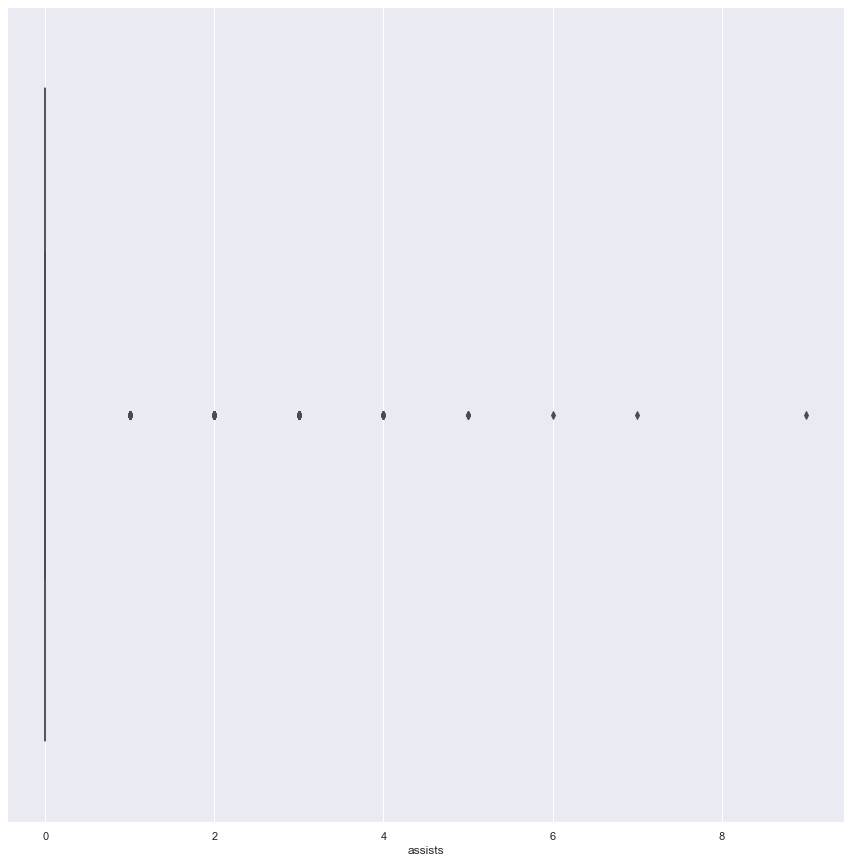

In [21]:
sns.boxplot(x = other_assists)
setSize(10, 5)

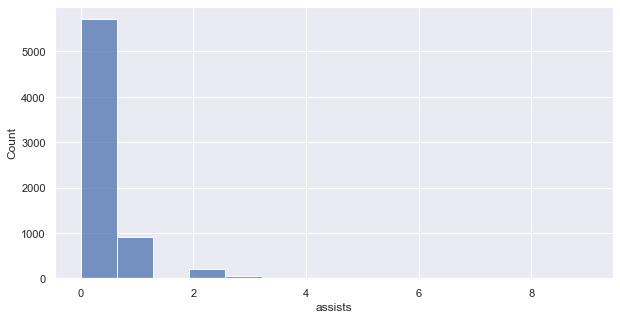

In [22]:
sns.histplot(data=other_assists)
setSize(20, 10)

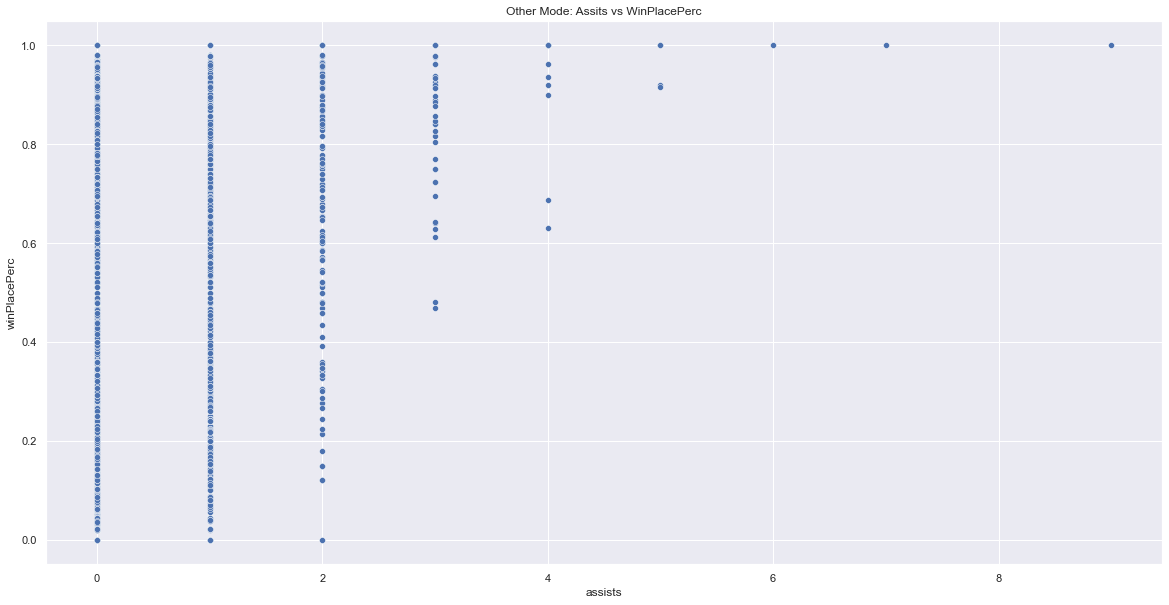

In [23]:
sns.scatterplot(x = other_data.assists, y = other_data.winPlacePerc)
plt.title("Other Mode: Assits vs WinPlacePerc")
setSize(20, 20)

In [24]:
other_data[other_data.assists>=5].winPlacePerc.mean()

0.9766714285714286

## damageDealt

In [25]:
data.damageDealt.describe()

count    3.112337e+06
mean     1.308052e+02
std      1.707624e+02
min      0.000000e+00
25%      0.000000e+00
50%      8.435000e+01
75%      1.862000e+02
max      6.616000e+03
Name: damageDealt, dtype: float64

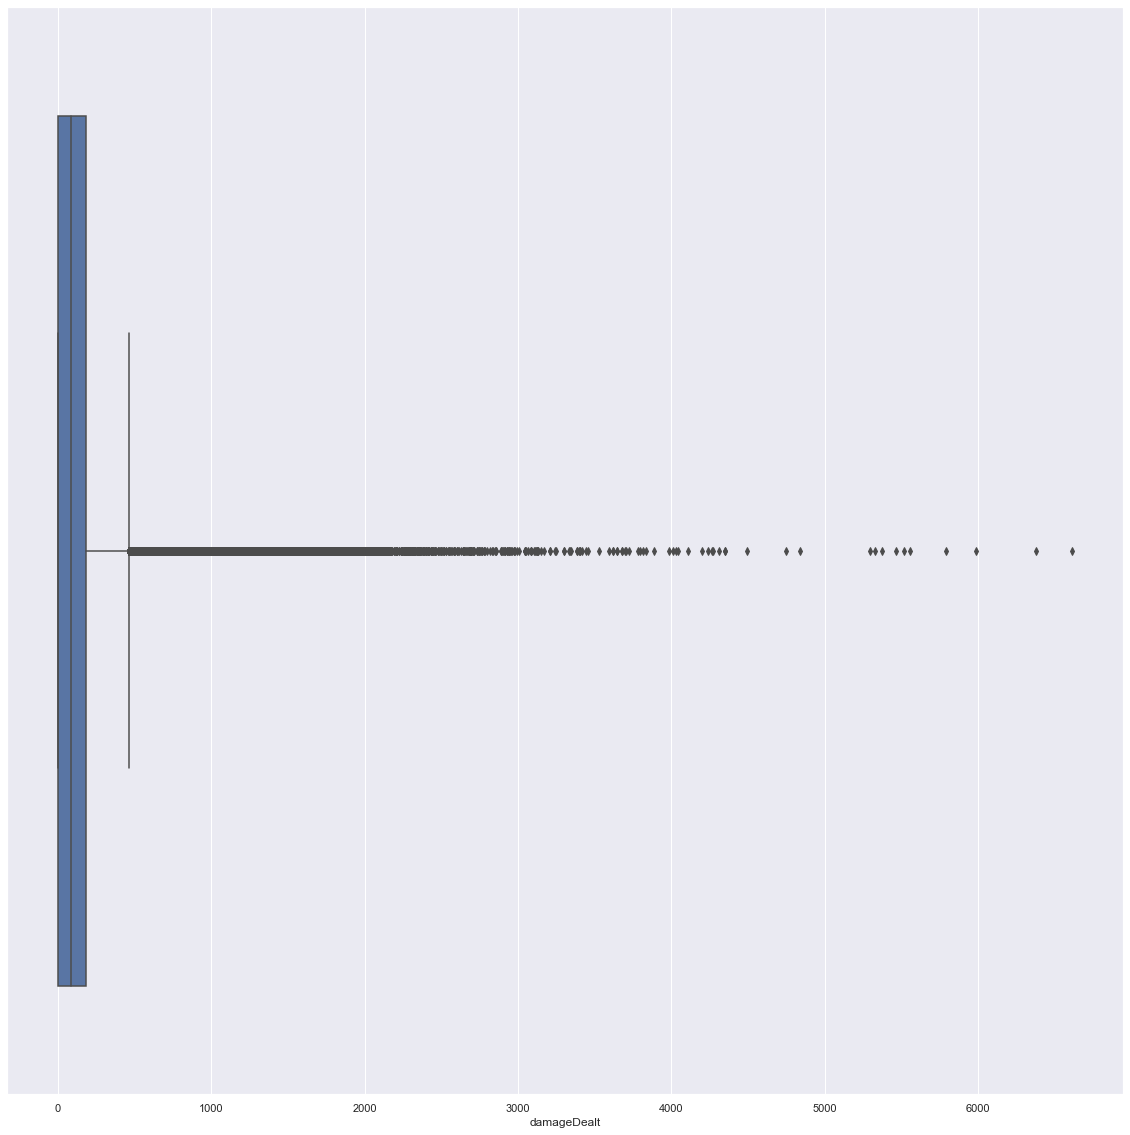

In [26]:
sns.boxplot(x = data.damageDealt)
setSize(10, 5)

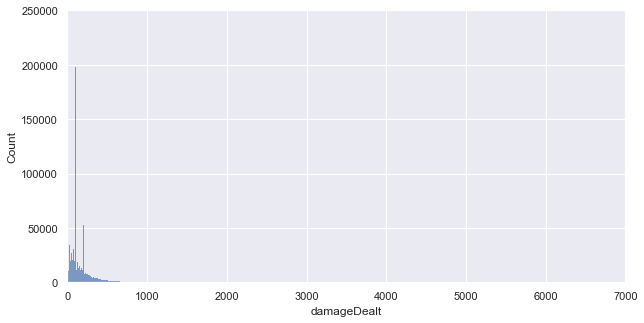

In [27]:
sns.histplot(data.damageDealt)
plt.xlim(0, 7000)
plt.ylim(0, 250000)
setSize(10, 10)

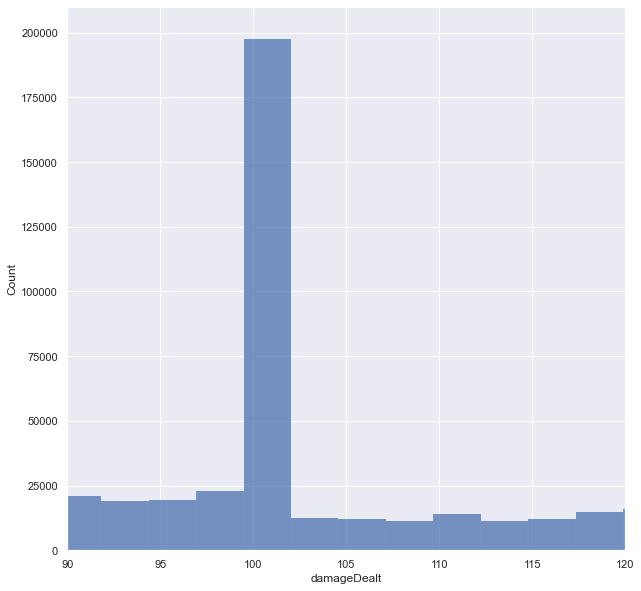

In [28]:
sns.histplot(data.damageDealt)
plt.xlim(90, 120)
plt.ylim(0, 210000)
setSize(10, 10)

What should we do about this uncertainity in the graph (sudden peak) it will add bias to the model? handle this!

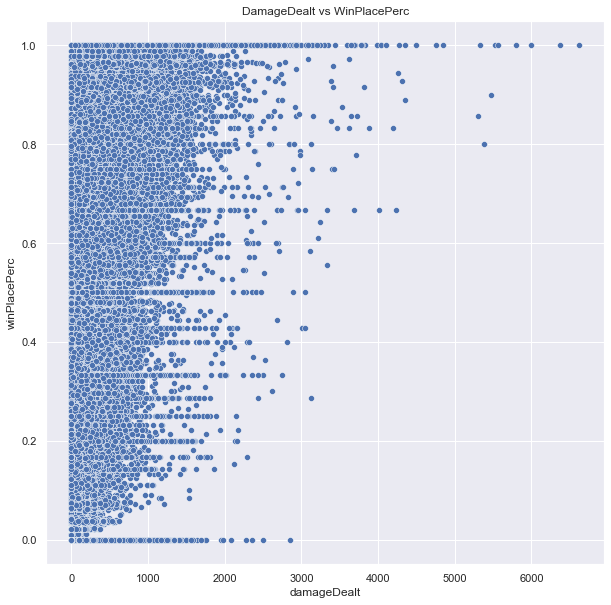

In [29]:
sns.scatterplot(x=data.damageDealt, y=data.winPlacePerc)
plt.title("DamageDealt vs WinPlacePerc")
setSize(20, 10)

## Standard Mode

In [30]:
standard_data.damageDealt.describe()

count    3.087707e+06
mean     1.293608e+02
std      1.655608e+02
min      0.000000e+00
25%      0.000000e+00
50%      8.398000e+01
75%      1.853000e+02
max      3.796000e+03
Name: damageDealt, dtype: float64

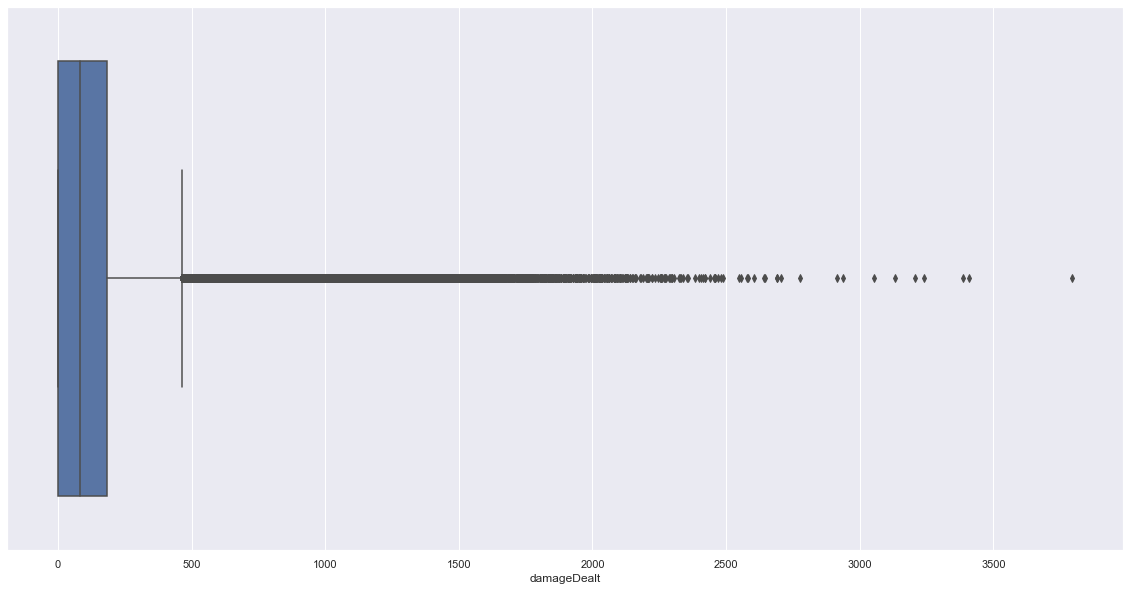

In [31]:
sns.boxplot(x = standard_data.damageDealt)
setSize(10, 5)

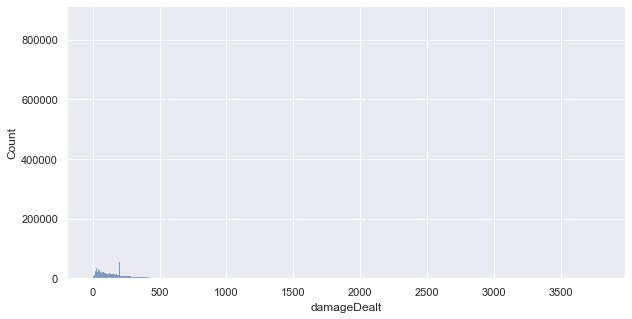

In [32]:
sns.histplot(standard_data.damageDealt)
setSize(20, 20)

In [33]:
standard_data[standard_data.damageDealt == 0].shape[0]/standard_data.shape[0]

0.2787421215808365

Around 28% of data have players with damageDealt == 0

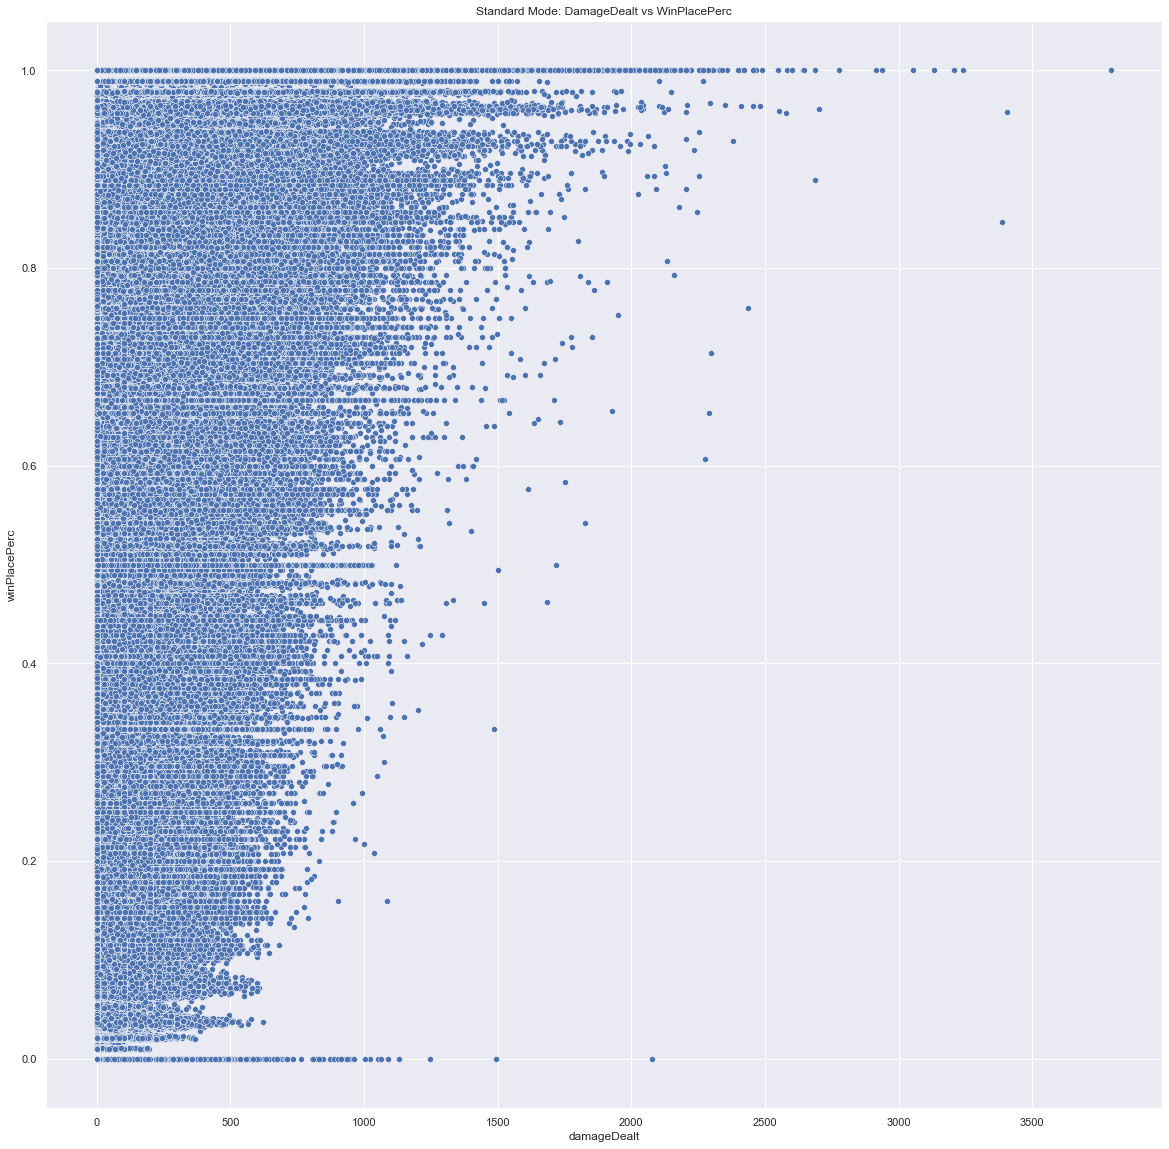

In [34]:
sns.scatterplot(x=standard_data.damageDealt, y=standard_data.winPlacePerc)
plt.title("Standard Mode: DamageDealt vs WinPlacePerc")
setSize(20, 10)

In [35]:
s1 = standard_data[standard_data.damageDealt > 1000]

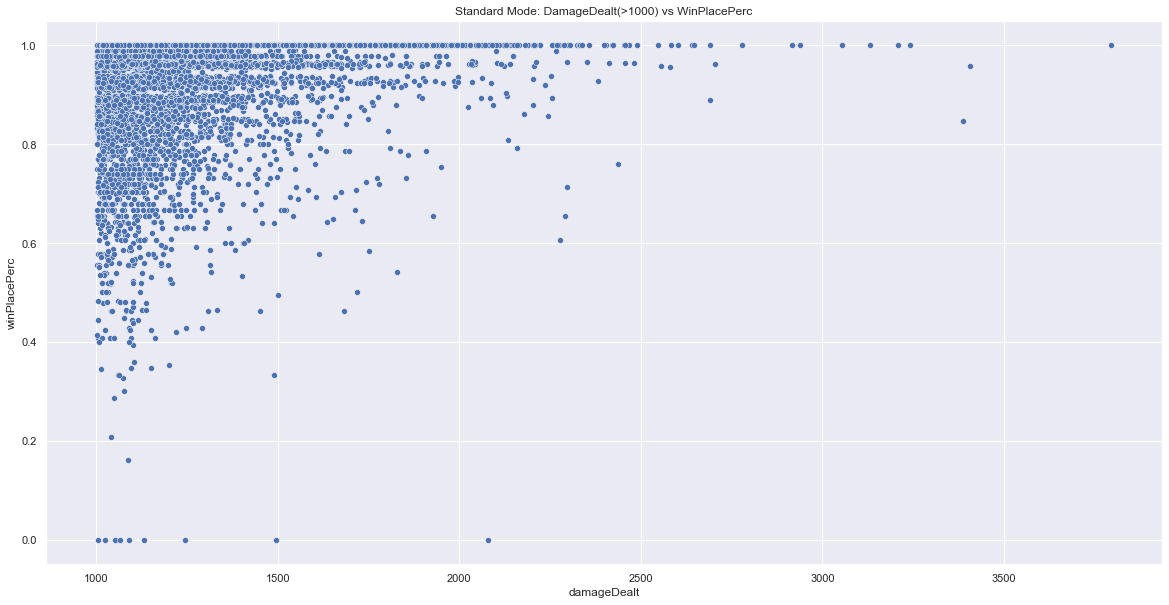

In [36]:
sns.scatterplot(x = s1.damageDealt, y = s1.winPlacePerc)
plt.title("Standard Mode: DamageDealt(>1000) vs WinPlacePerc")
setSize(10, 10)

#### We can see that for plot (damage dealt > 1000 vs winPlacePerc), the scatterplot is showing more towards upper side i.e towards high winplace percent.

## Arcade Mode

In [37]:
arcade_data.damageDealt.describe()

count    17757.000000
mean       392.873790
std        516.819624
min          0.000000
25%         58.880000
50%        203.800000
75%        541.100000
max       6616.000000
Name: damageDealt, dtype: float64

In [38]:
q1 = arcade_data.damageDealt.quantile(0.25)
q3 = arcade_data.damageDealt.quantile(0.75)
iqr = q3 - q1
maxi = q3 + 1.5*iqr
mini = q1 - 1.5*iqr
print(maxi)

1264.43


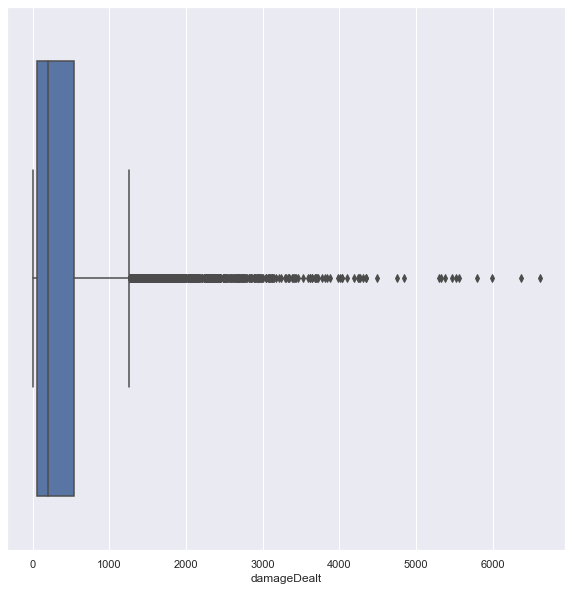

In [39]:
sns.boxplot(x = arcade_data.damageDealt)
setSize(10, 5)

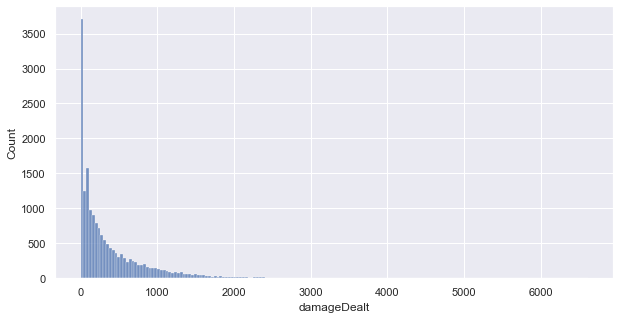

In [40]:
sns.histplot(arcade_data.damageDealt)
setSize(15, 15)

In [41]:
arcade_data[arcade_data.damageDealt > 1200]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4,1ac4d37b63dea6,1cc44ecc214dad,6575f2a4ef9fd4,3,2,1408.0,0,8,5,1,0,19,4,191.50,595,arcade-mode,5,5,1500,0,0.0,0,0.0,0,0,1441.00,4,0,1.0000
8,f69c34cce4d46a,ea800ea1aa6efa,ed092b499ac27d,3,0,2817.0,0,6,2,3,1000,28,4,81.38,1059,arcade-mode,6,6,-1,0,0.0,0,0.0,0,0,1147.00,31,1500,0.4000
15,b41a5c0151a7b9,40543f947ef9e6,7a7755e592e9d0,11,0,1780.0,0,2,14,8,1000,12,3,28.56,1028,arcade-mode,13,11,-1,0,0.0,0,0.0,0,0,76.43,33,1500,0.6667
73,37139873bf026e,5bf05f57dbce03,23c1bb8452a1f3,2,0,1616.0,0,1,17,13,1000,13,2,37.36,1376,arcade-mode,6,6,-1,0,0.0,0,0.0,1,0,436.40,38,1500,0.2000
97,445fb94aad167b,94007caedef0af,bb9b3f1230e218,7,0,1606.0,0,4,0,2,1000,15,4,21.03,526,arcade-mode,6,6,-1,0,0.0,0,0.0,1,0,95.66,20,1500,0.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17665,6ff954a8bc32da,4e35851956afb4,c15c378af9019b,5,0,1359.0,0,3,0,4,1000,13,4,34.36,663,arcade-mode,8,8,-1,0,0.0,0,0.0,0,0,487.00,18,1500,1.0000
17705,dd983648eb1f22,4d632f8cce2bb4,d481bc1556f9a2,5,1,3441.0,0,10,12,1,0,36,4,200.90,1797,arcade-mode,6,6,1500,0,0.0,0,0.0,1,0,64.94,38,0,1.0000
17709,d76c74bf581ca9,0867f0a8246602,93edb943c25530,5,3,1510.0,0,6,0,4,0,15,2,189.70,1368,arcade-mode,7,7,1500,0,0.0,0,0.0,0,0,467.80,15,0,0.8333
17742,dafee0560def4d,ab1b94af0326c5,4881dc60a3e594,11,0,1666.0,17,4,3,20,1000,11,2,39.44,1195,arcade-mode,12,12,-1,0,3648.0,0,0.0,0,0,1076.00,25,1500,0.7273


In [42]:
arcade_data[arcade_data.damageDealt > 1200].winPlacePerc.mean()

0.7125573103987485

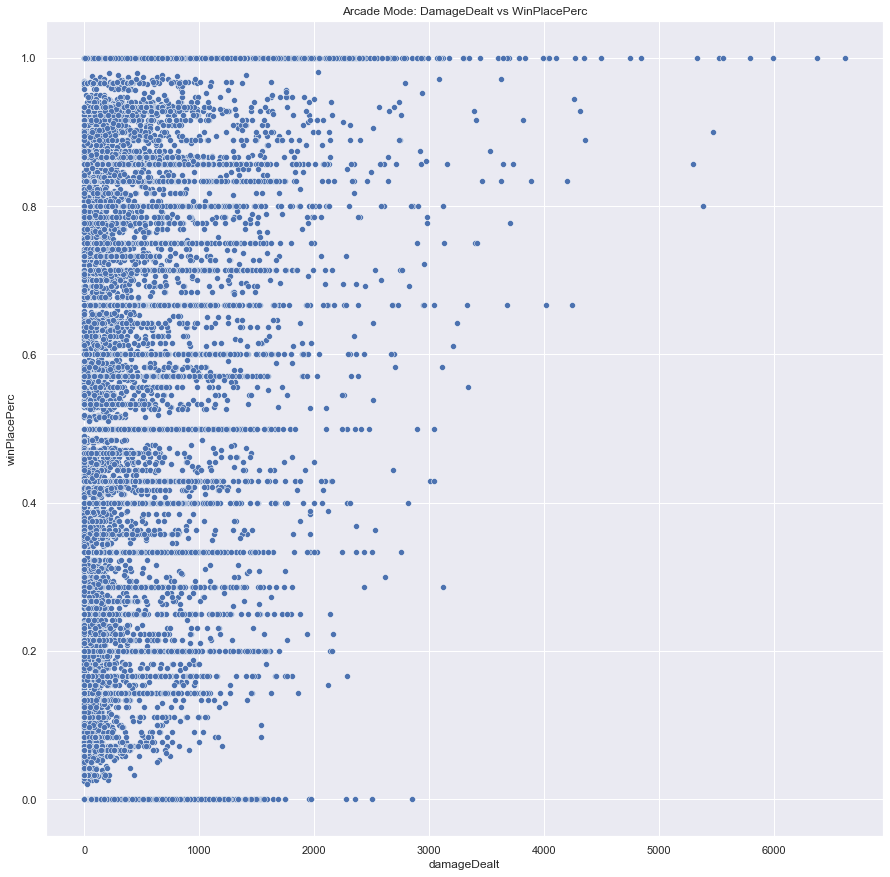

In [43]:
sns.scatterplot(x=arcade_data.damageDealt, y=arcade_data.winPlacePerc)
plt.title("Arcade Mode: DamageDealt vs WinPlacePerc")
setSize(20, 10)

## Other Mode

In [44]:
other_data.damageDealt.describe()

count    6873.000000
mean      102.608014
std       145.633364
min         0.000000
25%         0.000000
50%        58.500000
75%       147.700000
max      2339.000000
Name: damageDealt, dtype: float64

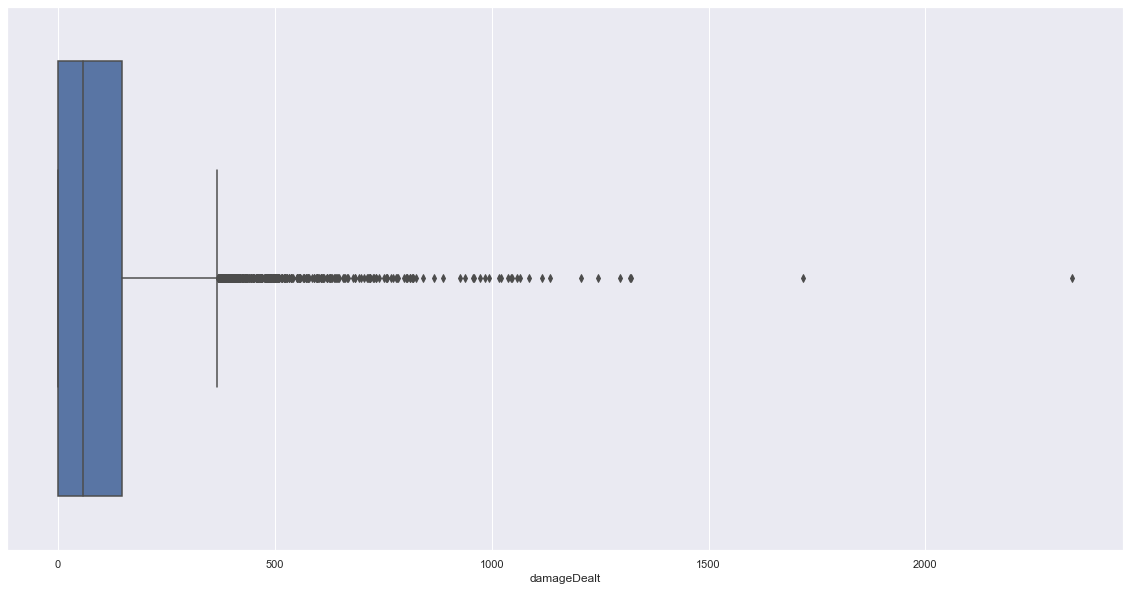

In [45]:
sns.boxplot(x = other_data.damageDealt)
setSize(10, 5)

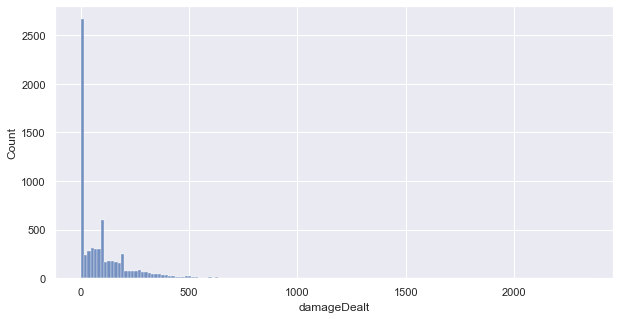

In [46]:
sns.histplot(other_data.damageDealt)
setSize(15, 15)

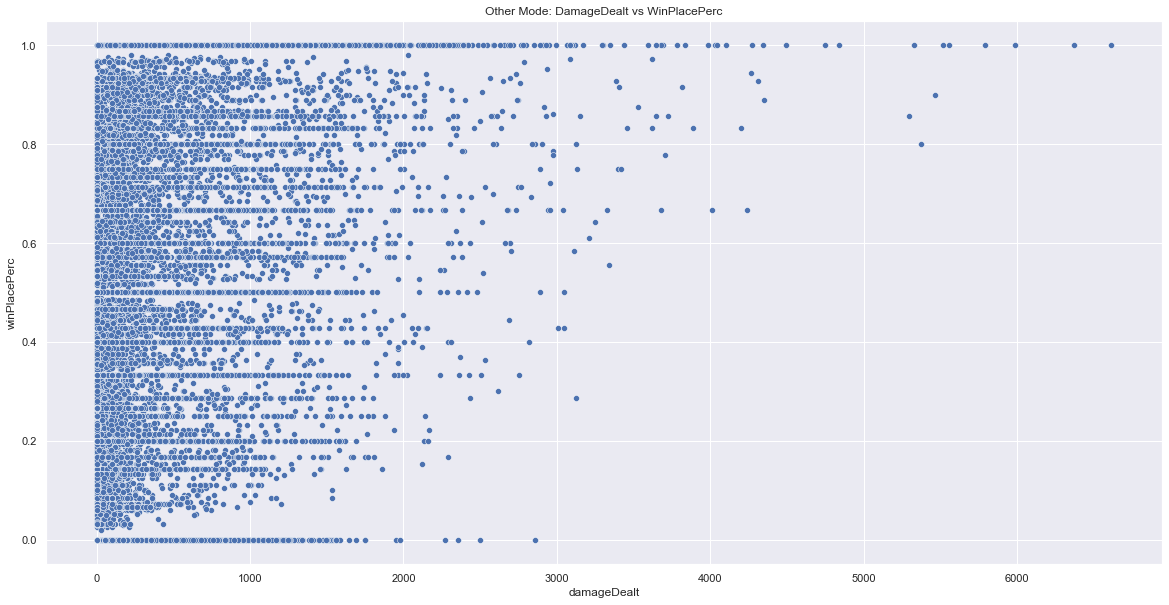

In [101]:
sns.scatterplot(data=arcade_data,x='damageDealt', y='winPlacePerc')
plt.title("Other Mode: DamageDealt vs WinPlacePerc")
setSize(20, 10)

# KILL :

* ### Kills
* ### Kill Streaks
* ### Kill Place
* ### Kill Points
* ### headshot kill
* ### longest kill
* ### road kill
* ### team kill


# 1. kills

In [48]:
data.kills.describe()

count    3.112337e+06
mean     9.254062e-01
std      1.558865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.200000e+01
Name: kills, dtype: float64

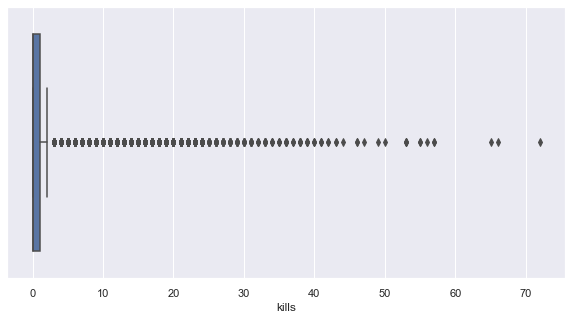

In [51]:
sns.boxplot(x=data.kills)
setSize(10, 5)

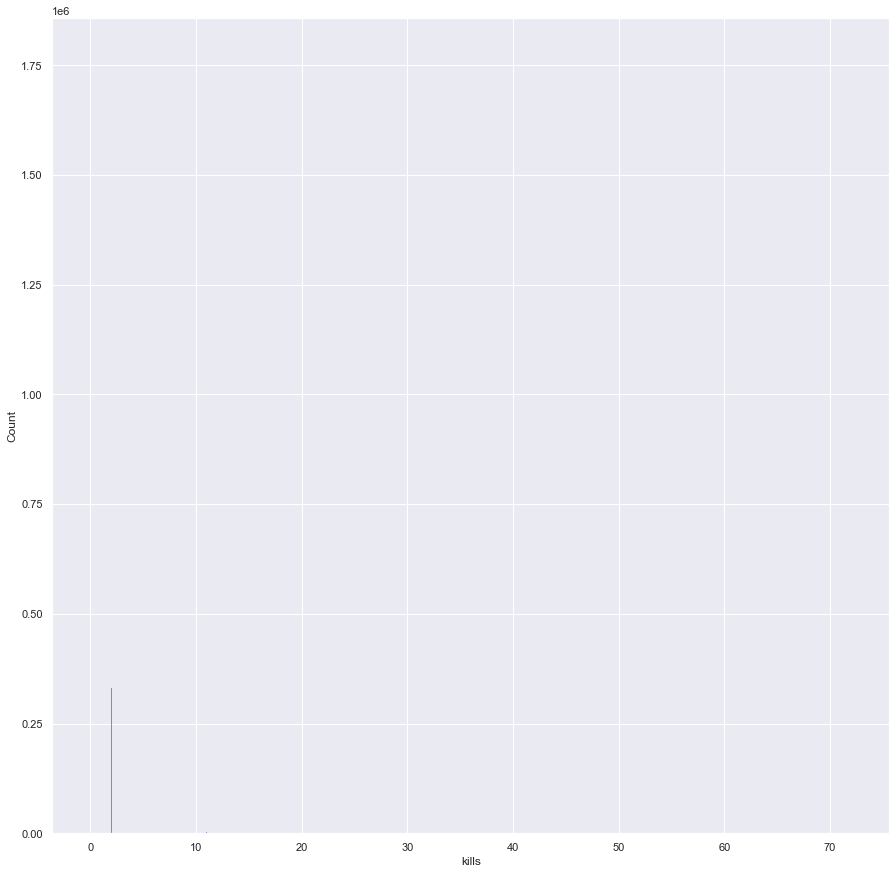

In [126]:
sns.histplot(data.kills)
setSize(15, 15)

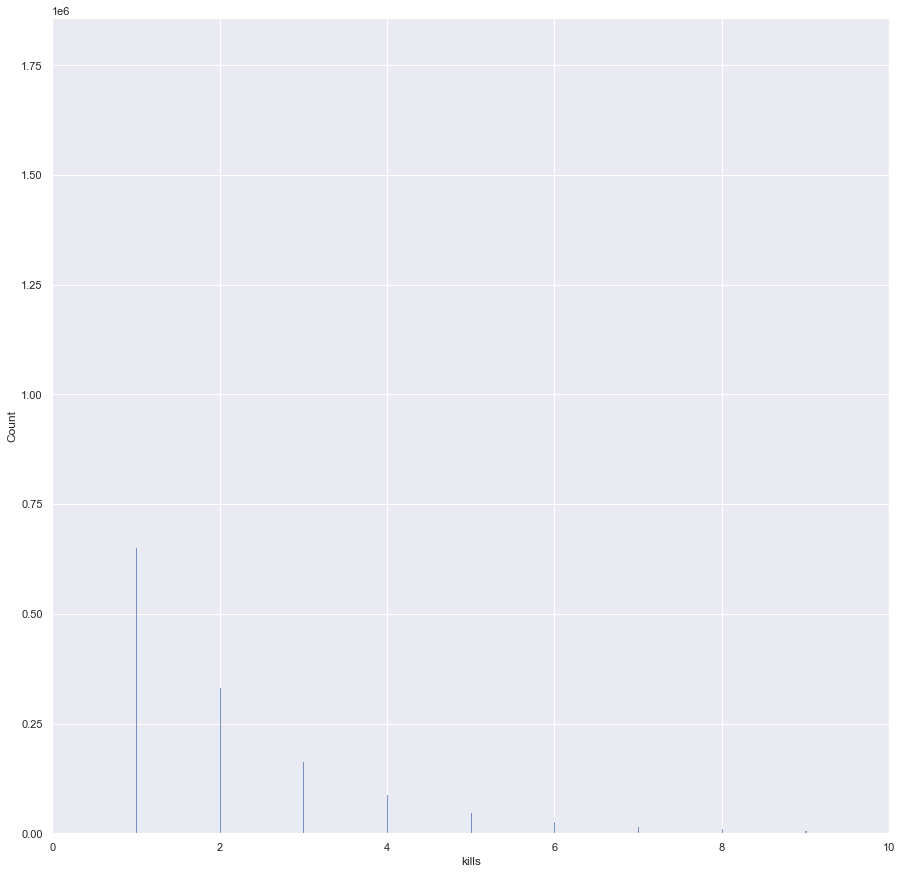

In [127]:
sns.histplot(data.kills)
plt.xlim(0, 10)
setSize(15, 15)

In [177]:
arcade_data[arcade_data.kills > 7].shape[0]/arcade_data.shape[0]

0.14670270879089936

# Think about kills = 7 for all kill >= 7 bcz 0.99 percent data has kill < 7 ?

In [148]:
data[(data.kills > 8)]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
199,b0bbfb763c3638,9698657afacf1b,9ba144167e801d,0,4,1065.0,9,2,2,1,0,11,2,239.80,1806,squad-fpp,17,15,1573,0,6708.0,0,0.00,0,0,2201.0,6,0,1.0000
403,1ac4d37b63dea6,1cc44ecc214dad,6575f2a4ef9fd4,3,2,1408.0,0,8,5,1,0,19,4,191.50,595,normal-squad-fpp,5,5,1500,0,0.0,0,0.00,0,0,1441.0,4,0,1.0000
534,462a6f766fe3c2,4bd624db79dd73,ac3c803c404a4f,1,6,1054.0,5,2,7,1,0,10,2,110.60,1814,duo-fpp,48,48,1660,1,5893.0,0,37.35,0,0,4782.0,5,0,0.9787
859,5ad08349ff4c82,0e152f33b5a192,d383e67d661b5b,2,8,1094.0,7,6,7,1,0,10,2,141.60,1960,squad,27,26,1423,0,1514.0,0,0.00,0,0,4531.0,9,0,1.0000
1028,d2ff79ce4eb20c,634101cd191ab7,21d8f9edf63834,2,4,901.5,7,3,4,1,0,10,3,204.40,1767,squad-fpp,29,28,1480,2,2885.0,0,21.95,0,0,5246.0,6,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111224,5e6202d139a77d,7f44e35b9dae52,3db7dd50c88b72,1,7,710.9,4,4,5,1,1492,9,2,92.49,1380,duo,47,46,-1,1,0.0,0,0.00,0,0,2951.0,8,1527,1.0000
3111257,47422b0b403ab9,0e86bbc7d43346,ce6067ba6a040d,4,3,1294.0,3,2,2,1,0,9,4,128.50,1839,squad,28,28,1489,0,4161.0,0,0.00,0,3,2629.0,8,0,0.8889
3111498,93839be8eb845c,cb07ec77abdfcb,ecbcefb300bb36,0,9,863.9,0,2,4,1,0,9,2,76.28,1395,solo-fpp,90,90,1520,0,0.0,0,0.00,0,0,2529.0,4,0,0.9213
3111585,4da5a2594d3846,6af53195dede2b,421b34ff791567,0,5,1160.0,0,5,3,1,1605,12,1,100.50,1374,solo-fpp,96,95,-1,0,0.0,0,0.00,0,0,2255.0,4,1494,0.9684


In [152]:
data[(data.kills == 0) & (data.winPlacePerc == 1) & (data.matchType == 'solo')]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
38158,7a408384a7dc66,2dd55fbe058837,2a7eeeabd39f0a,0,0,0.00,0,0,0,2,0,0,0,0.0,1808,solo,15,2,1500,0,0.0,0,0.000,0,0,95.40,6,0,1.0
70347,2f5e16d57fbfa2,cad362c8f8d2ab,6b40410be908eb,0,1,43.00,0,0,0,1,0,0,0,0.0,1808,solo,18,2,1500,0,4059.0,0,0.000,0,0,37.46,6,0,1.0
98359,50c3b936d5e205,5a6b8962211eb0,4a41a495d0dc58,0,0,40.59,0,0,0,5,0,0,0,0.0,1808,solo,18,2,1500,0,359.8,0,0.000,0,0,159.30,14,0,1.0
141447,09dd1a5a2e6f31,e4bbbbd7af29dc,d1c663de6e23bf,0,0,23.97,0,0,0,2,0,0,0,0.0,1808,solo,16,2,1500,0,7832.0,0,9.409,0,0,1098.00,2,0,1.0
249446,77634520202cc3,21c3eb599dee6e,dbbc3e4f9ead1e,0,0,80.48,0,0,1,1,0,0,0,0.0,1808,solo,17,2,1500,0,0.0,0,0.000,0,0,630.50,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034609,c140a4b81c0053,280843c6a87d53,30ec1426e1d434,0,0,0.00,0,0,0,1,0,0,0,0.0,1808,solo,19,2,1500,0,3336.0,0,0.000,0,0,315.30,8,0,1.0
3052698,8bb2e0d0ed64f6,6f1c3ec3e1a03c,f37dc144d476dd,0,0,99.00,0,0,0,2,0,0,0,0.0,1808,solo,17,2,1500,0,705.8,0,0.000,0,0,162.00,3,0,1.0
3057506,99e7901d855f60,2c38b0c8e84556,7082e37e9ffe69,0,0,79.20,0,0,0,1,0,0,0,0.0,1808,solo,16,2,1500,0,0.0,0,0.000,0,0,2007.00,13,0,1.0
3092052,c1d39188fbc7a0,9713eb8d7c3a1f,d5b4951b8d2d80,0,0,0.00,0,0,0,3,0,0,0,0.0,1808,solo,18,2,1500,0,0.0,0,0.000,0,0,1054.00,2,0,1.0


# Think about removing these rows or not ?